In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

data_folder = "data"
spotify_file = "spotify_articles.csv"
spotify_path = os.path.join(data_folder, spotify_file)

In [2]:
def cleanArticle(article):
    paras = article.split("###")
    paras = [para for para in paras if len(para.split()) > 4]
    return("\n".join(paras))

spotify_df = pd.read_csv(spotify_path)
spotify_df["clean_text"] = [cleanArticle(text) for text in spotify_df["text"]]

spotify_df.head()

,id,publisher,scrape_time,text,clean_text
0,1256,gizmodo.com,2018-06-02T09:16:55-04:00,YouTube Music Isn't Even Close to a Spotify Ki...,YouTube Music Isn't Even Close to a Spotify Ki...
1,1333,cnn.com,2018-06-01T19:03:02-04:00,Spotify reverses policy weeks after removing R...,Spotify reverses policy weeks after removing R...
2,1710,sandiegouniontribune.com,2018-06-01T04:28:42-04:00,Spotify CEO says anti-hate policy was rolled o...,Spotify CEO says anti-hate policy was rolled o...
3,2313,foxnews.com,2018-06-01T16:15:12-04:00,Spotify CEO Daniel Ek admits company's misstep...,Spotify CEO Daniel Ek admits company's misstep...
4,3270,foxbusiness.com,2018-06-01T17:13:57-04:00,Spotify backtracks on anti-hate policy followi...,Spotify backtracks on anti-hate policy followi...


In [3]:
import documents as docs

In [25]:
doc_a = docs.Document(spotify_df["clean_text"][0])
doc_c = docs.Document(spotify_df["clean_text"][1])
doc_b = docs.Document(spotify_df["clean_text"][1])


Text(5, 0, '5')

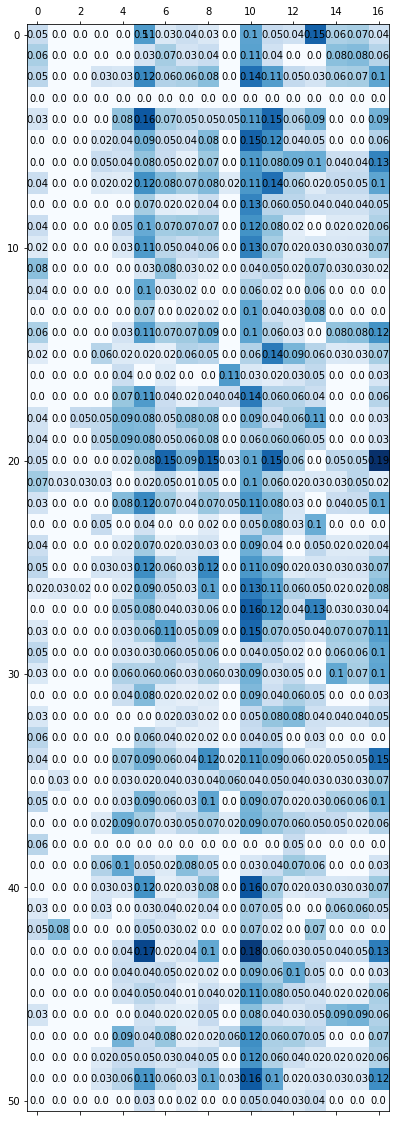

In [22]:
comparer = docs.ArticleComparisons(doc_a, doc_b)
jac_mat = comparer.jaccard_matrix()

fig = plt.figure(figsize=(40,20))
ax = fig.add_subplot(111)
ax.matshow(jac_mat, cmap=plt.cm.Blues)

for i in range(jac_mat.shape[0]):
    for j in range(jac_mat.shape[1]):
        c = round(jac_mat[i, j], 2)
        ax.text(j, i, str(c), va='center', ha='center')


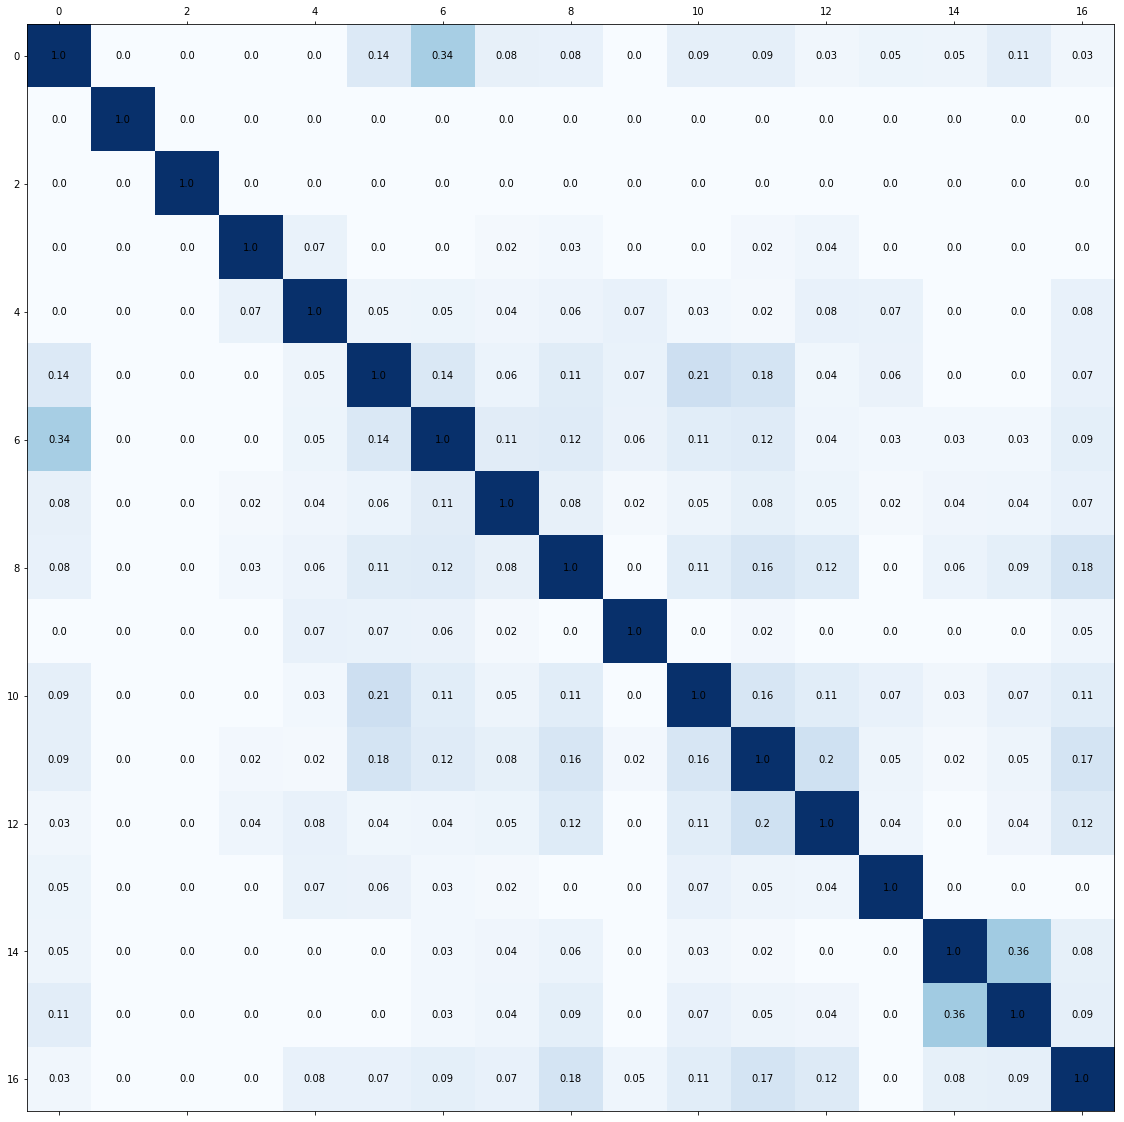

In [26]:
comparer = docs.ArticleComparisons(doc_b, doc_c)
jac_mat = comparer.jaccard_matrix()

fig = plt.figure(figsize=(40,20))
ax = fig.add_subplot(111)
ax.matshow(jac_mat, cmap=plt.cm.Blues)

for i in range(jac_mat.shape[0]):
    for j in range(jac_mat.shape[1]):
        c = round(jac_mat[i, j], 2)
        ax.text(j, i, str(c), va='center', ha='center')
